In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/loan-status/train.csv')

In [3]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [4]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

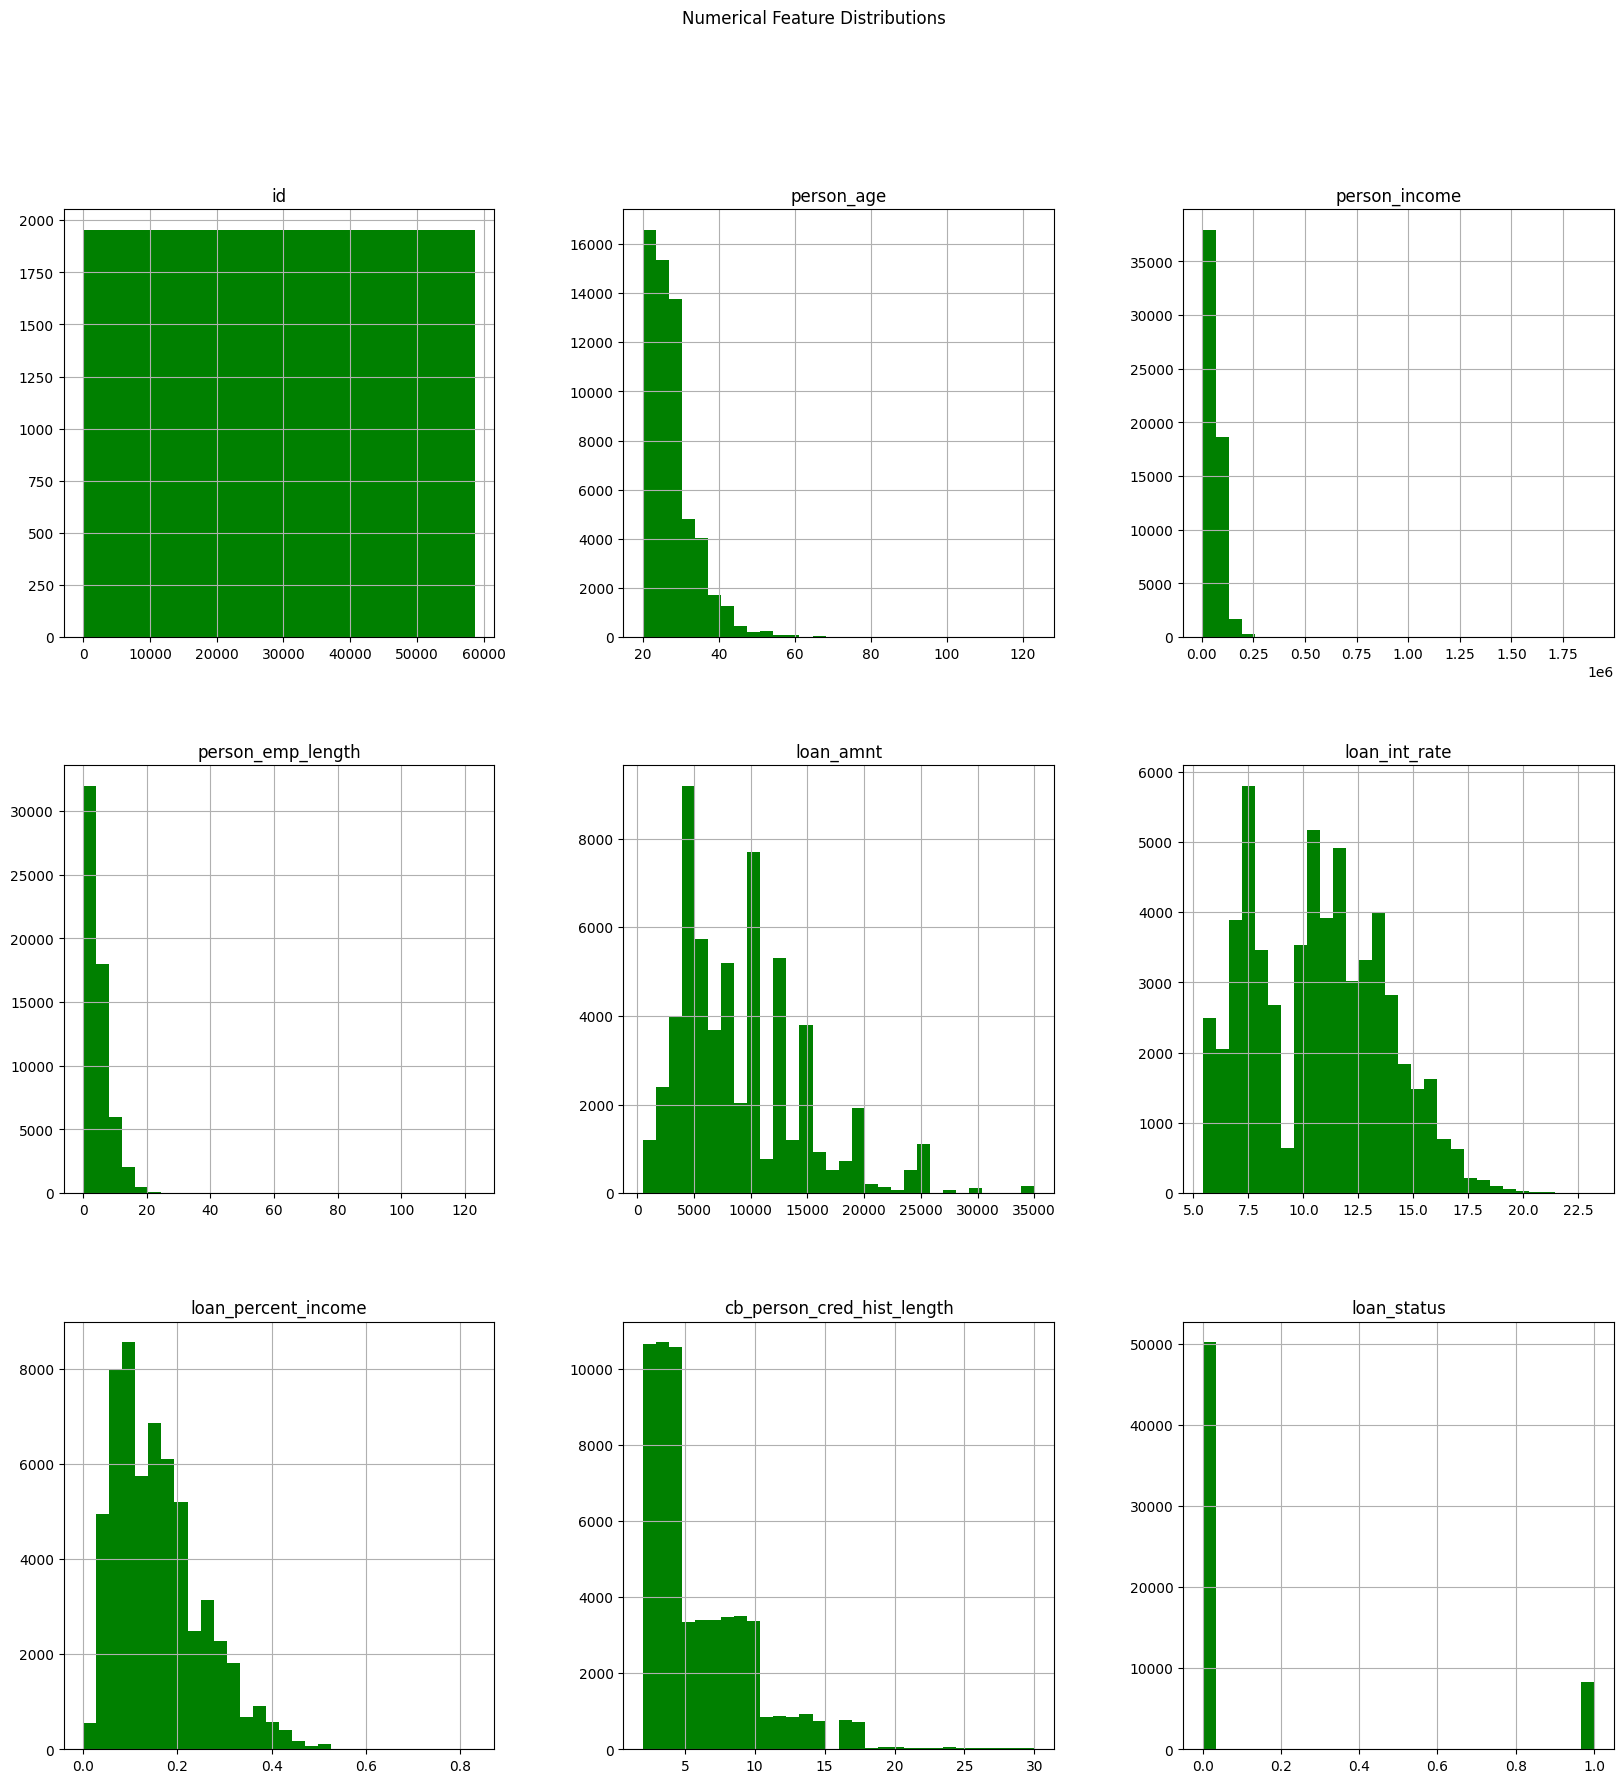

In [6]:
numerical_col = df.select_dtypes(exclude='object').columns
df[numerical_col].hist(bins=30, figsize=(20,20) , color='green')
plt.suptitle('Numerical Feature Distributions')
plt.show()

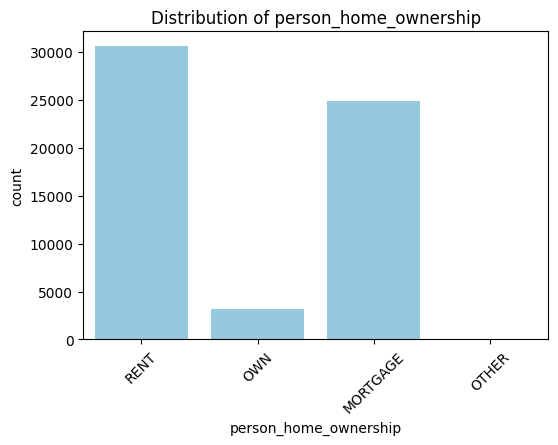

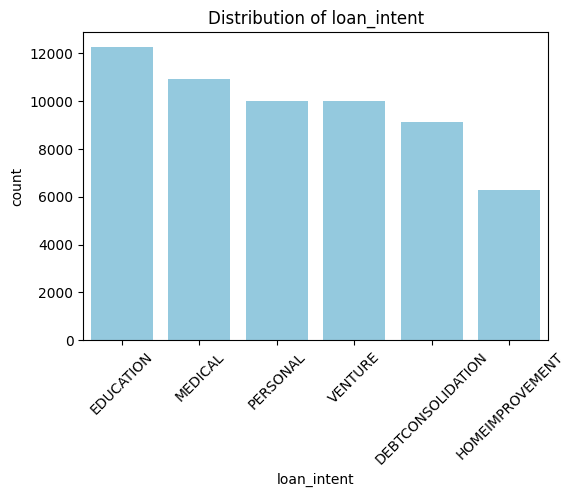

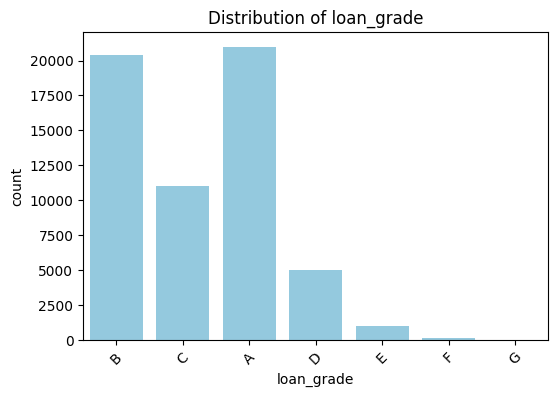

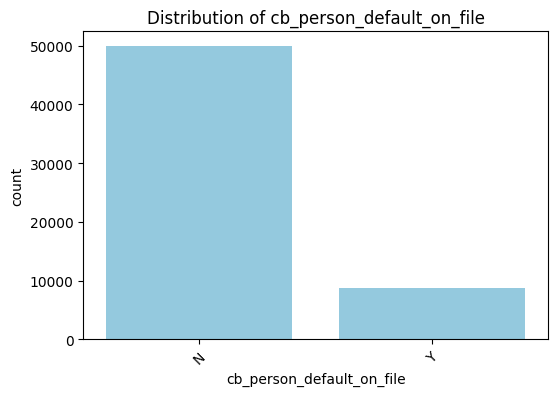

In [7]:
catigorical_col = df.select_dtypes(include='object').columns
for col in catigorical_col : 
    plt.figure(figsize=(6 ,4))
    sns.countplot(data=df , x=col , color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.show()

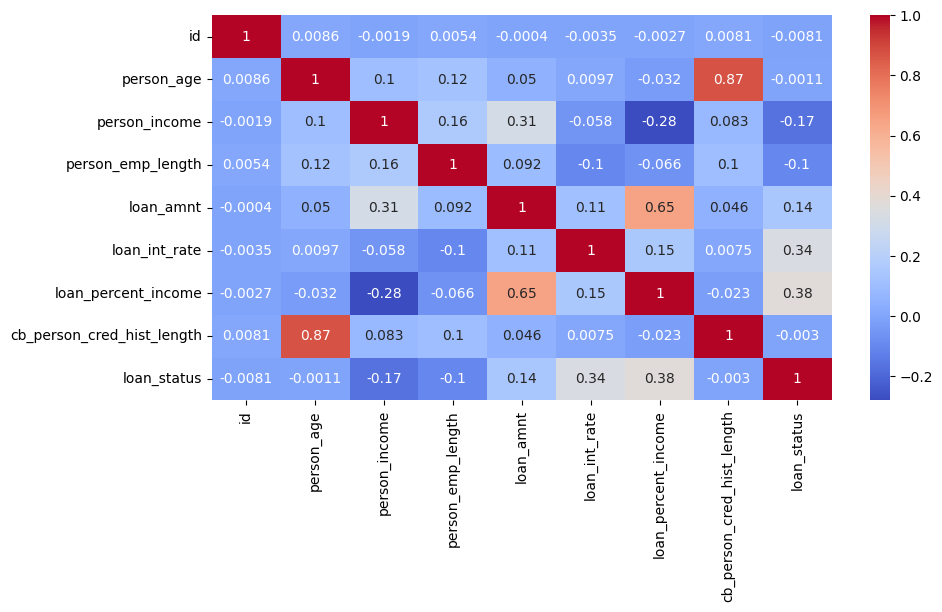

In [8]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True , cmap='coolwarm')  
plt.show()

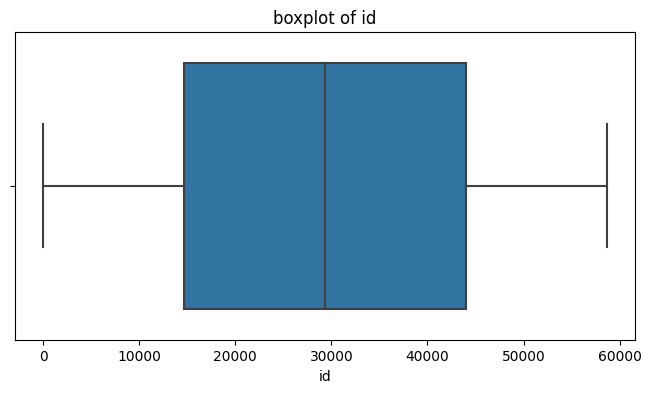

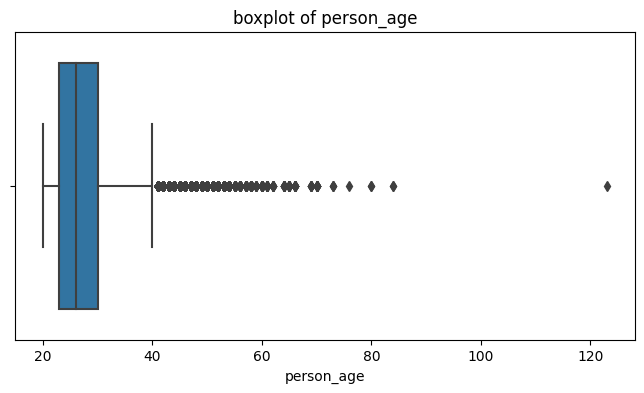

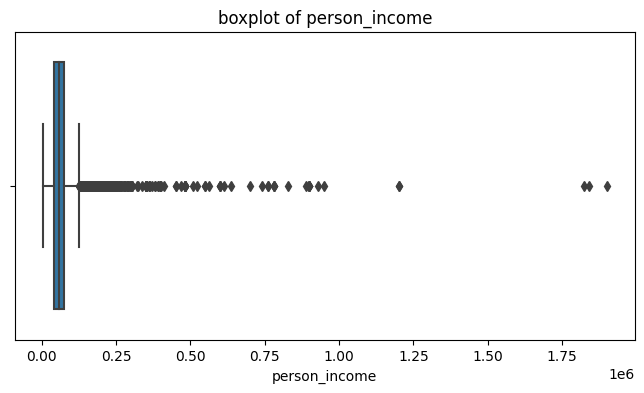

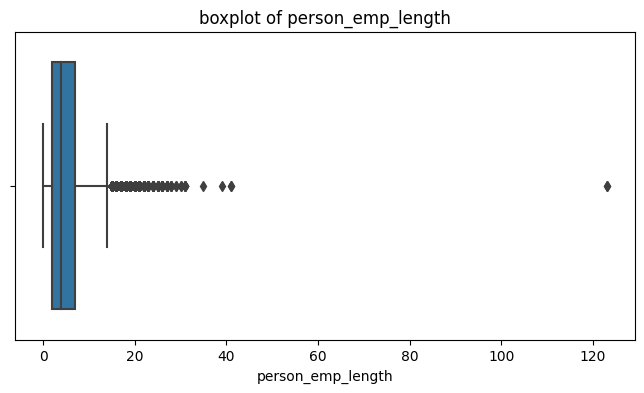

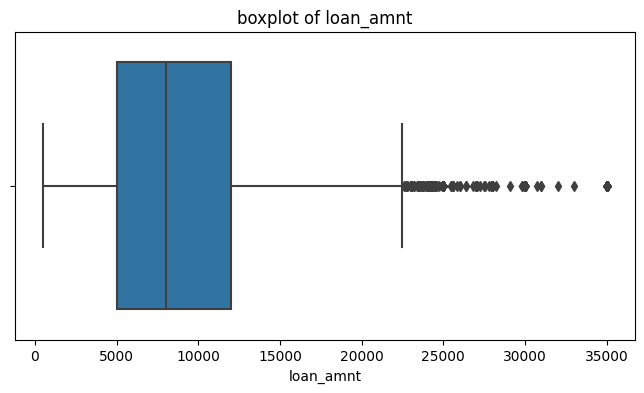

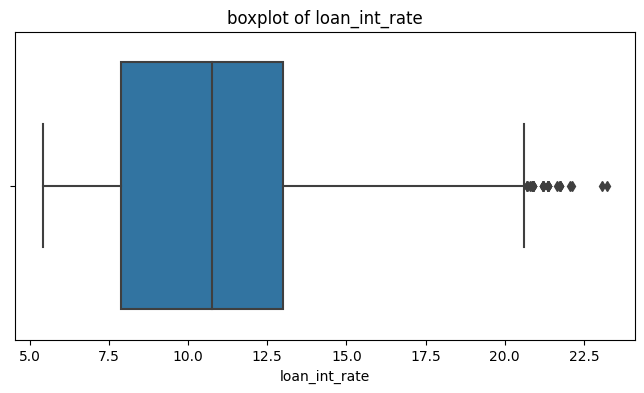

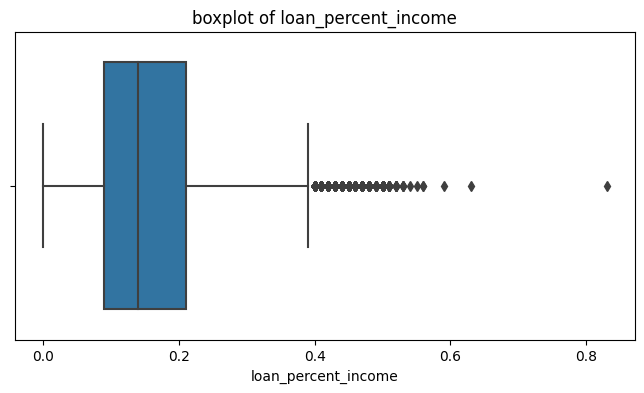

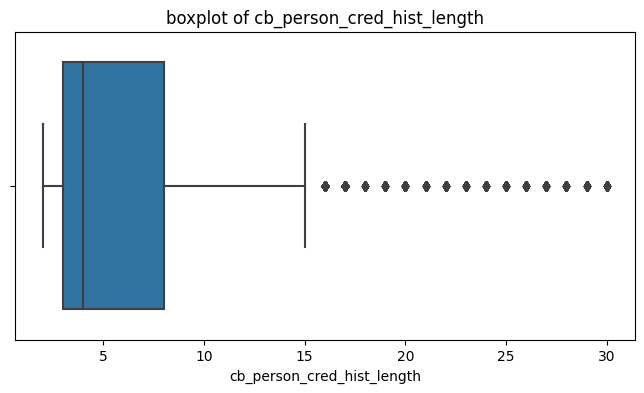

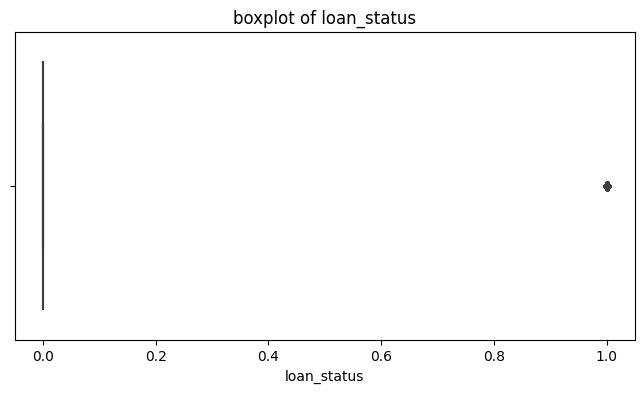

In [9]:
for col in numeric_df:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=numeric_df,x=col)
    plt.title(f"boxplot of {col}")
    plt.show()


In [10]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR

df_without_outliers = numeric_df[~((numeric_df<lower_bound) | (numeric_df>upper_bound)).any(axis=1)]

print(f'Original dataset Shape : {numeric_df.shape}')
print(f'Dataset size after removing outliers {df_without_outliers.shape}')

Original dataset Shape : (58645, 9)
Dataset size after removing outliers (43467, 9)


In [11]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])

In [12]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [13]:
x = df.drop (columns=['id','loan_status'], axis=1)
y = df['loan_status']

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
model= DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9260806547872794


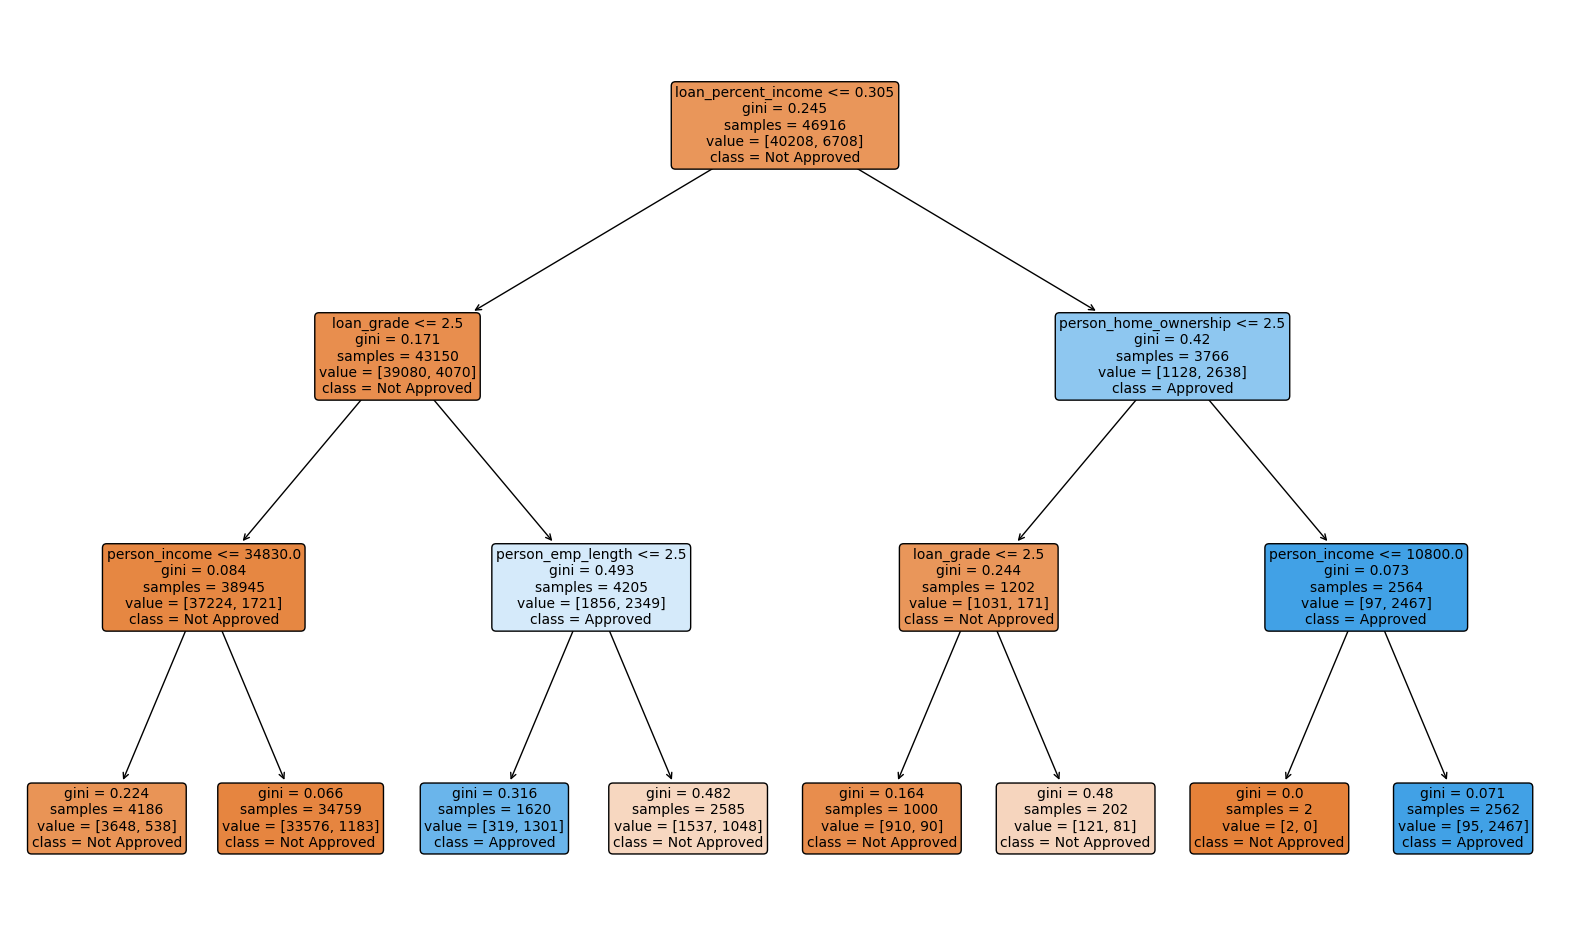

In [16]:
plt.figure(figsize=(20, 12))  # Adjust the figure size
plot_tree(model, 
          feature_names=x.columns, 
          class_names=["Not Approved", "Approved"], 
          filled=True, 
          rounded=True, 
          fontsize=10)  # Increase font size
plt.show()

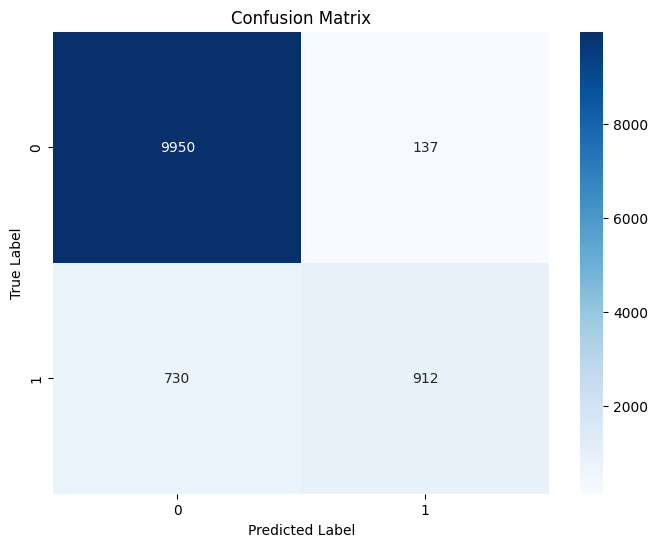

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()